# Image Recognition with Deep Learning

Image recognition and classification is computationally intensive. Without supercomputers, it's best to work with images of smaller sizes (e.g. upto 512 x 512 pixels). Covolution procedure is important for image recognition and classification. It detects specific patterns and takes care of translational invariance, making the machine learning model recognize an object no matter where it is moved within the image.

## Import required libraries

In [14]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from matplotlib import pyplot as plt

from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

## Loading and preprocessing the dataset 

x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


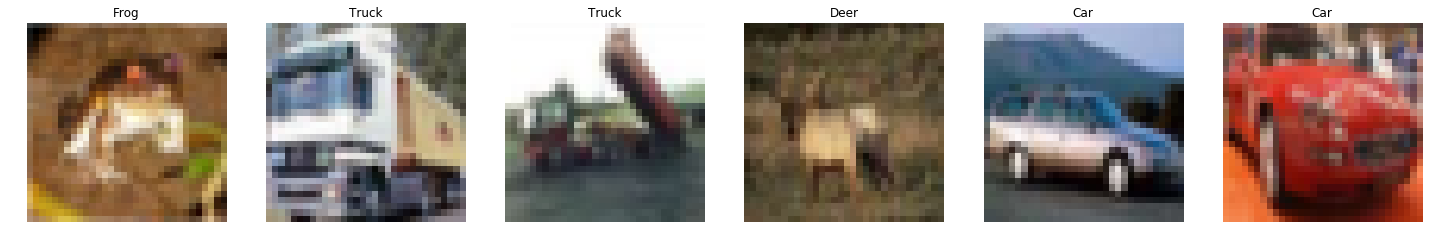

In [57]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train : {}".format(x_train.shape))
print("y_train : {}".format(y_train.shape))
print("x_test : {}".format(x_test.shape))
print("y_test : {}".format(y_test.shape))

# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]
      
# Loop through somes pictures in the data set and draw the image as a plot    
fig, axs = plt.subplots(1,6, figsize=(25, 25))
axs = axs.ravel()

for i in range(6):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = class_labels[image_class_number]

    axs[i].imshow(sample_image)
    axs[i].set_title(image_class_name)
    axs[i].axis('off')

In [44]:
# Normalize data set to 0-to-1 range
# Neural networks works best when values are between 0 & 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
# Labels are single values from 0 to 9
# Instead, we want each label to be an array with an element set to 1 and and the rest set to 0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Designing and building a deep neural network

In [3]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu")) # 32 filters each of size (3 x 3), padding='same' implies extra padding in keras
model.add(Conv2D(32, (3, 3), activation="relu")) # activation function here is used to increase the non-linearity in the output
model.add(MaxPooling2D(pool_size=(2, 2))) # Reduces the no of parameters to a great extent (it passes only important information to the next layer)
model.add(Dropout(0.25)) # randomnly cut neural connections from previous layer (the network has a tendency to memorise images rather than identifying patterns in them)

model.add(Conv2D(64, (3, 3), padding='same', activation="relu")) # To make the neural network more powerful, it's normal to have many convolution blocks before the dense layer(s)
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # when we transition from convolution blocks to dense layers, 2-D data ---> 1-D
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [4]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

## Training the deep neural network

In [5]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=64, # 32 to 128 (no of images to feed into the network for training at once)
    epochs=30, # one full pass through the entire dataset
    validation_data=(x_test, y_test),
    shuffle=True # randomizes the training batches coming into the network, need for improving model accuracy
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 208s 4ms/step - loss: 1.5945 - accuracy: 0.4130 - val_loss: 1.2220 - val_accuracy: 0.5591
Epoch 2/30
50000/50000 [==============================] - 213s 4ms/step - loss: 1.1980 - accuracy: 0.5717 - val_loss: 1.0169 - val_accuracy: 0.6405
Epoch 3/30
50000/50000 [==============================] - 214s 4ms/step - loss: 1.0211 - accuracy: 0.6386 - val_loss: 0.8839 - val_accuracy: 0.6991
Epoch 4/30
50000/50000 [==============================] - 210s 4ms/step - loss: 0.9121 - accuracy: 0.6747 - val_loss: 0.8095 - val_accuracy: 0.7192
Epoch 5/30
50000/50000 [==============================] - 211s 4ms/step - loss: 0.8373 - accuracy: 0.7061 - val_loss: 0.7890 - val_accuracy: 0.7262
Epoch 6/30
50000/50000 [==============================] - 214s 4ms/step - loss: 0.7815 - accuracy: 0.7247 - val_loss: 0.7699 - val_accuracy: 0.7280
Epoch 7/30
50000/50000 [==============================] - 202s

## Save / Load the neural network's structure and trained weights

In [6]:
# Network structure (to reuse the trained model later)
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure) # convert json to text

# Trained weights
# The reason we save the structure separately from the weights is because often we will train the same neural network multiple times with different settings or different training datasets
model.save_weights("model_weights.h5")

In [8]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("model_weights.h5")

## Model prediction accuracy

In [18]:
# Testing with few images
IMGS = ["car.png", "frog.png", "cat.png"]
for c in IMGS:
    # Load an image file to test, resizing it to 32x32 pixels (as required by this model)
    img = image.load_img(c, target_size=(32, 32))

    # Convert the image to a numpy array
    image_to_test = image.img_to_array(img) / 255

    # Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
    list_of_images = np.expand_dims(image_to_test, axis=0)

    # Make a prediction using the model
    results = model.predict(list_of_images)

    # Since we are only testing one image, we only need to check the first result
    single_result = results[0]

    # We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
    most_likely_class_index = int(np.argmax(single_result))
    class_likelihood = single_result[most_likely_class_index]

    # Get the name of the most likely class
    class_label = class_labels[most_likely_class_index]

    # Print the result
    print("This is image of a {} with likelihood: {:2f}".format(class_label, class_likelihood))

This is image of a Car with likelihood: 0.908410
This is image of a Frog with likelihood: 0.708550
This is image of a Cat with likelihood: 0.954709
